# NLP and Naive Bayes

### Task 1. Data Exploration and Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Task 1: Data Exploration and Preprocessing

# Load the dataset
df = pd.read_csv('blogs.csv')
print("First few rows of the dataset:")
print(df.head())

# Exploratory Data Analysis (EDA)
print("\nDataset Information:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
print("\nCategory Distribution:")
print(df['Labels'].value_counts())

# Data Cleaning
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['Cleaned_Data'] = df['Data'].apply(preprocess_text)
print("\nFirst few rows after cleaning the data:")
print(df.head())

# Feature Extraction
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Data']).toarray()
y = df['Labels']

print("\nFeature extraction completed. Shape of X:", X.shape)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dorkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dorkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dorkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


First few rows of the dataset:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None

Dataset Description:
                                                     Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantal

### Task 2. Naive Bayes Model for Text Classification

In [2]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Task 2: Naive Bayes Model for Text Classification

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the model
print("\nNaive Bayes Classifier Performance:")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Naive Bayes Classifier Performance:
Accuracy: 0.8225
Precision: 0.8276176687627891
Recall: 0.8225
F1 Score: 0.8171026916205227

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95

### Task 3. Sentiment Analysis


Sentiment Distribution:
Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


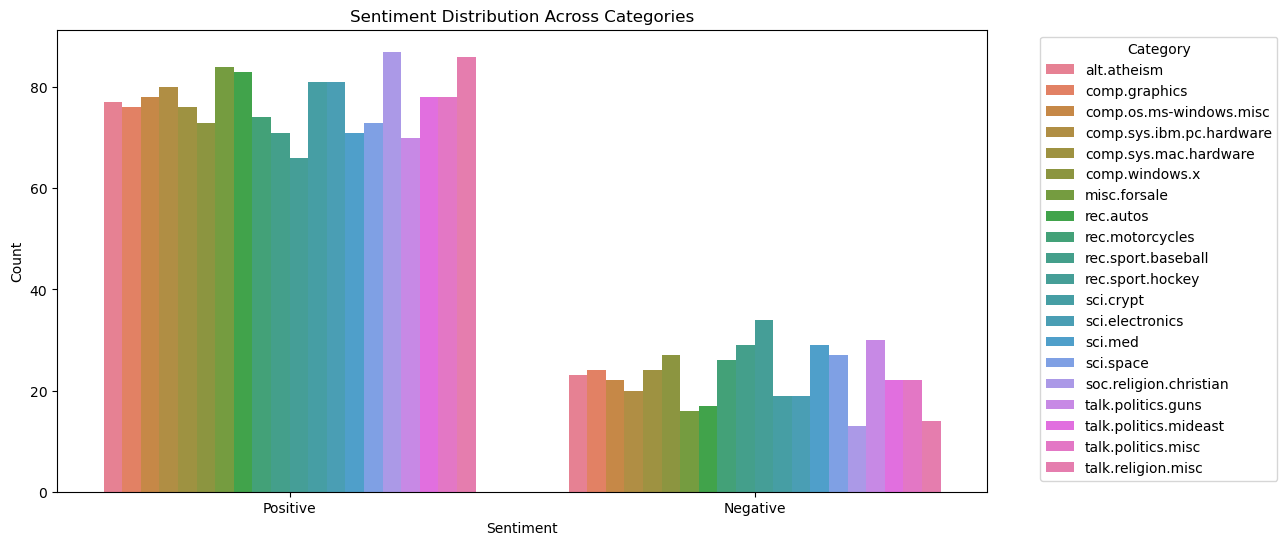


Sentiment Summary by Category:
Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc     

In [5]:
# Import necessary libraries
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Task 3: Sentiment Analysis

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to the Data column
df['Sentiment'] = df['Data'].apply(get_sentiment)
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())

# Analyze Sentiment Distribution Across Categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Sentiment', hue='Labels', data=df)
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Summarize findings
sentiment_summary = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)
print("\nSentiment Summary by Category:")
print(sentiment_summary)


### Task 4. Evaluation

In [7]:
# Evaluate the model
print("\nNaive Bayes Classifier Performance:")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Naive Bayes Classifier Performance:
Accuracy: 0.8225
Precision: 0.8276176687627891
Recall: 0.8225
F1 Score: 0.8171026916205227

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95